# Detección de Fraude con Tarjetas de crédito
# Grupo 3
## Bruno Dueñas, Fernando Mejía, Mateo Córdova

# Importar librerías

In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Machine Learning
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import linear_model,preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
import tensorflow as tf
import graphviz

## Importando la data proveniente del csv y mostrándo el contenido de la data

In [737]:
column_names = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order","fraud"]
dframe=pd.read_csv("data/card_transdata.csv")
dframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Encontrar las características que mejor describen los datos

In [738]:
dframe.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Copia para el modelo en keras

In [739]:
dframeKeras = dframe.copy()

## Copia para el arbol de decisión sklearn

In [740]:
dframeArbol = dframe.copy()

## Normalización de la data

In [741]:
scaler = StandardScaler()
dframe.iloc[:,0:-1] = scaler.fit_transform(dframe.iloc[:,0:-1].to_numpy())

In [742]:
dframe

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425,0.0
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425,0.0
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909,0.0
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909,0.0
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909,0.0
...,...,...,...,...,...,...,...,...
999995,-0.373473,-0.190529,-0.070505,0.366584,1.361576,-0.334458,-1.364425,0.0
999996,-0.103318,-0.091035,0.340808,0.366584,1.361576,-0.334458,-1.364425,0.0
999997,-0.362650,-0.137903,-0.573694,0.366584,1.361576,-0.334458,0.732909,0.0
999998,-0.342098,-0.185523,-0.481628,0.366584,-0.734443,-0.334458,0.732909,0.0


## Revisar valores nulos (de existir)

In [743]:
dframe.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Recuentos de valores para variables categóricas (repeat_retailer, used_chip, used_pin_number, online_order y fraude)

In [744]:
for column in dframe.columns[3:9]:
    print(dframe[column].value_counts())
    print()

 0.366584    881536
-2.727890    118464
Name: repeat_retailer, dtype: int64

-0.734443    649601
 1.361576    350399
Name: used_chip, dtype: int64

-0.334458    899392
 2.989911    100608
Name: used_pin_number, dtype: int64

 0.732909    650552
-1.364425    349448
Name: online_order, dtype: int64

0.0    912597
1.0     87403
Name: fraud, dtype: int64



## Matriz de correlación entre la data

<AxesSubplot:>

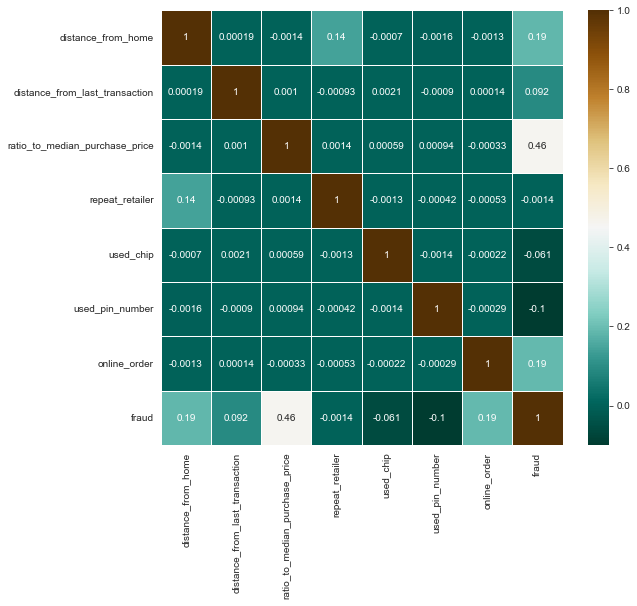

In [745]:
correlation_mat = dframe.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'BrBG_r',linewidths=0.5)

### Análisis univariado para eliminar la característica que tiene el menor efecto en la variable objetivo (fraude)

In [746]:
scores = []
Univ_Analysis = SelectKBest(score_func=f_classif, k=7)
fit = Univ_Analysis.fit(dframe[dframe.columns[0:7]], dframe[dframe.columns[7]])
newcols = Univ_Analysis.get_support(indices=True)
for i in range(7):
    print ("Caracterisicas:  ",column_names[i], ", Puntuación: ", fit.scores_[i])
    scores.append(fit.scores_[i])
print("Más baja = ",min(scores))

Caracterisicas:   distance_from_home , Puntuación:  36465.69332586085
Caracterisicas:   distance_from_last_transaction , Puntuación:  8520.690791240206
Caracterisicas:   ratio_to_median_purchase_price , Puntuación:  271820.173833205
Caracterisicas:   repeat_retailer , Puntuación:  1.8426704992520047
Caracterisicas:   used_chip , Puntuación:  3731.7684653980787
Caracterisicas:   used_pin_number , Puntuación:  10160.776030233745
Caracterisicas:   online_order , Puntuación:  38263.51828118835
Más baja =  1.8426704992520047


### Dado que tenemos la puntuación más baja para repeat_retailer, la excluimos de nuestro análisis.

In [747]:
dframe.drop(['repeat_retailer'], axis=1, inplace=True)

## Separar la data en variables de entrenamiento y variables de prueba

In [748]:
train, test = train_test_split(dframe, test_size=0.2)

## Variables de entrenamiento y variables de prueba

In [749]:
t_data = train[train.columns[0:6]]
t_target = train[train.columns[6]]
w_test = test[test.columns[0:6]]
w_true = test[test.columns[6]] #Para validar el accuracy

In [750]:
w_true

686273    0.0
187740    0.0
255985    0.0
474853    1.0
863348    0.0
         ... 
760776    0.0
589886    0.0
686439    0.0
433358    0.0
240723    0.0
Name: fraud, Length: 200000, dtype: float64

In [751]:
t_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order
461454,0.384407,-0.054442,1.523847,-0.734443,-0.334458,0.732909
117475,0.004641,-0.095781,-0.274581,1.361576,-0.334458,0.732909
522681,1.414734,-0.190755,0.180787,-0.734443,-0.334458,-1.364425
596633,-0.332721,-0.114783,-0.393745,-0.734443,-0.334458,-1.364425
281974,-0.213768,-0.090997,0.869829,-0.734443,-0.334458,0.732909
...,...,...,...,...,...,...
254025,0.263546,0.618381,0.108748,-0.734443,-0.334458,0.732909
209311,4.548562,-0.141753,-0.401431,1.361576,-0.334458,0.732909
198230,-0.218090,0.281376,-0.183541,-0.734443,2.989911,0.732909
379952,0.076194,-0.172031,-0.550324,-0.734443,-0.334458,-1.364425


## Arbol de decisión sklearn
### Entrenamiento del modelo

In [752]:
dframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
0,0.477882,-0.182849,0.043491,1.361576,-0.334458,-1.364425,0.0
1,-0.241607,-0.188094,-0.189300,-0.734443,-0.334458,-1.364425,0.0
2,-0.329369,-0.163733,-0.498812,-0.734443,-0.334458,0.732909,0.0
3,-0.372854,0.021806,-0.522048,1.361576,-0.334458,0.732909,0.0
4,0.268572,-0.172968,0.142373,1.361576,-0.334458,0.732909,0.0


In [753]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(t_data, t_target)

## Graficar el arbol de decisión

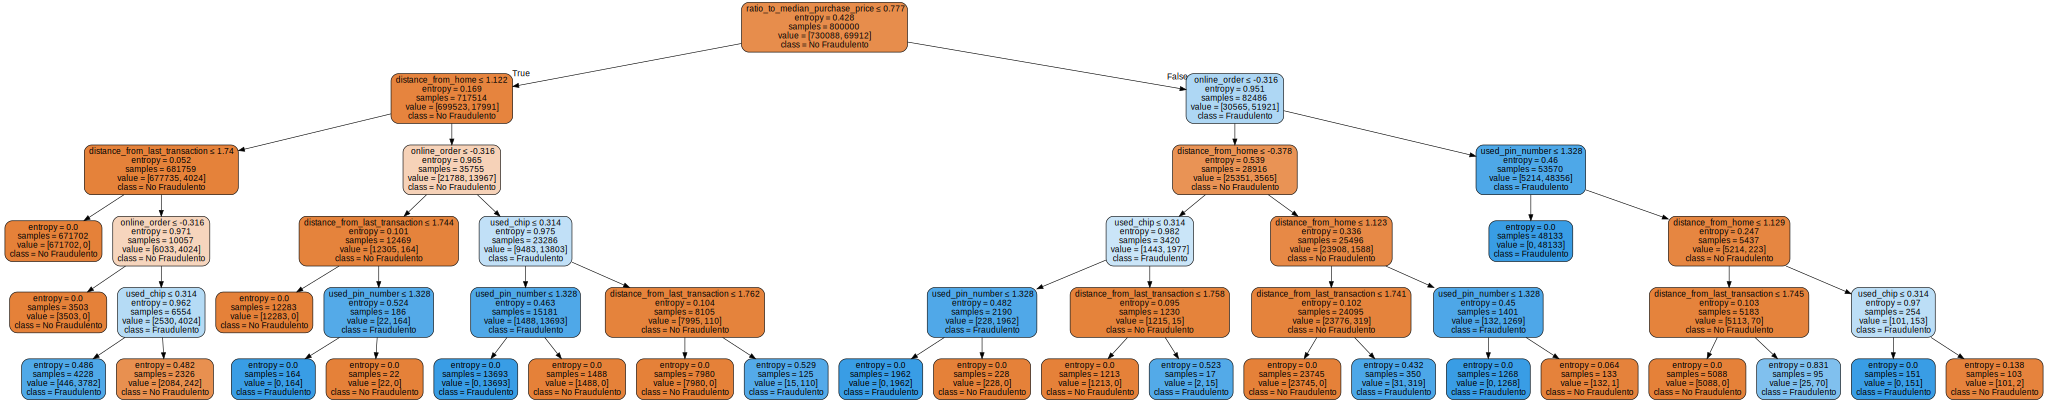

In [754]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No Fraudulento", "Fraudulento"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Predicción de la data con el arbol de decisión sklearn

In [755]:
y_respuesta = clf.predict(w_test)

In [756]:
y_respuesta

array([0., 0., 0., ..., 0., 0., 0.])

In [757]:
acc = metrics.accuracy_score(w_true, y_respuesta, normalize=True, sample_weight=None)
print('Accuracy del árbol de decisión: {}%'.format(acc * 100))

Accuracy del árbol de decisión: 99.8995%


In [758]:
metrics.confusion_matrix(w_true, y_respuesta)

array([[182386,    123],
       [    78,  17413]], dtype=int64)

## Arbol de decisión sin tratamiento de datos

In [759]:
dframeArbol.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [760]:
trainSin, testSin = train_test_split(dframeArbol, test_size=0.2)

In [761]:
t_data = trainSin[trainSin.columns[0:7]]
t_target = trainSin[trainSin.columns[7]]
w_test = testSin[testSin.columns[0:7]]
w_true = testSin[testSin.columns[7]]  #Para validar el accuracy

In [762]:
w_true

526750    0.0
303758    0.0
646247    0.0
134579    0.0
154149    1.0
         ... 
254147    1.0
461275    1.0
455004    0.0
912249    1.0
624293    0.0
Name: fraud, Length: 200000, dtype: float64

In [763]:
t_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
231901,3.916185,3.933570,3.636136,1.0,0.0,0.0,1.0
193585,1.235421,5.708732,0.939595,0.0,0.0,0.0,0.0
472695,2.045156,1.127541,4.062069,1.0,0.0,0.0,1.0
117945,3.539523,1.623663,7.112307,1.0,0.0,0.0,0.0
263069,27.562920,0.583032,0.366040,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
438583,14.739895,0.038170,0.424966,1.0,0.0,0.0,1.0
26609,11.379176,0.371962,2.178940,1.0,0.0,0.0,1.0
218789,4.276711,0.124951,0.826113,1.0,0.0,0.0,1.0
121384,1.905373,0.404679,2.016492,1.0,0.0,0.0,1.0


## Arbol de decisión sklearn
### Entrenamiento del modelo (Sin tratamiento de data)

In [764]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(t_data, t_target)

## Graficar el arbol de decisión

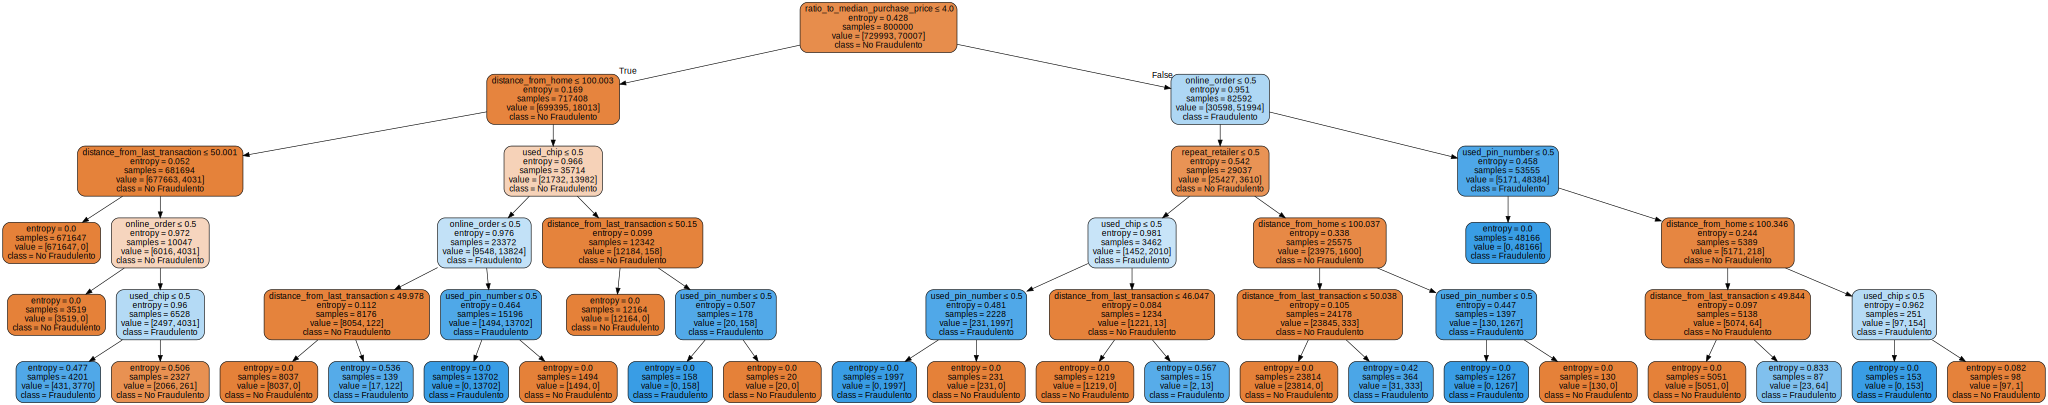

In [765]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(t_data.columns.values),
                                class_names=["No Fraudulento", "Fraudulento"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Predicción de la data con el arbol de decisión sklearn

In [766]:
y_respuesta = clf.predict(w_test)

In [767]:
y_respuesta

array([0., 0., 0., ..., 0., 1., 0.])

In [768]:
acc = metrics.accuracy_score(w_true, y_respuesta, normalize=True, sample_weight=None)
print('Accuracy del árbol de decisión: {}%'.format(acc * 100))

Accuracy del árbol de decisión: 99.8985%


In [769]:
metrics.confusion_matrix(w_true, y_respuesta)

array([[182460,    144],
       [    59,  17337]], dtype=int64)

# Modelo Neuronal con Keras

In [770]:
scaler = StandardScaler()
dframeKeras.iloc[:,0:-1] = scaler.fit_transform(dframeKeras.iloc[:,0:-1].to_numpy())

## Separar la data en variables de entrenamiento y variables de prueba

In [771]:
trainKeras, testKeras = train_test_split(dframeKeras, test_size=0.2)

## Definir data y target

In [772]:
t_data = trainKeras[trainKeras.columns[0:7]]
t_target = trainKeras[trainKeras.columns[7]]
w_test = testKeras[testKeras.columns[0:7]].iloc[0:1000]
w_true = testKeras[testKeras.columns[7]].iloc[0:1000]  #Para validar el accuracy

## Crear el modelo de la red neuronal

In [773]:
def get_basic_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [774]:
model = get_basic_model()
historial = model.fit(t_data, t_target, epochs=2, verbose=True)

Epoch 1/2
25000/25000 [==============================] - 31s 1ms/step - loss: 0.0274 - accuracy: 0.9894
Epoch 2/2
25000/25000 [==============================] - 31s 1ms/step - loss: 0.0099 - accuracy: 0.9961


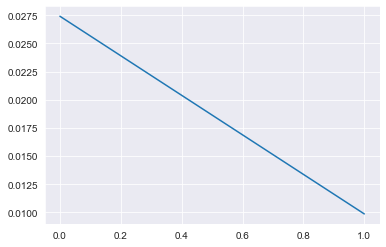

In [775]:
plt.plot(historial.history['loss'])

In [776]:
model.predict(w_test)

32/32 [==============================] - 0s 903us/step


array([[-29.207273  ],
       [-19.314463  ],
       [-16.720522  ],
       [-19.357407  ],
       [-10.771799  ],
       [-25.026789  ],
       [ -7.5694776 ],
       [ -0.1717687 ],
       [-69.87008   ],
       [-27.304115  ],
       [-16.470474  ],
       [-28.605202  ],
       [-54.945312  ],
       [-41.471153  ],
       [  0.3200936 ],
       [-18.234335  ],
       [-18.531605  ],
       [-22.066462  ],
       [-43.54336   ],
       [-18.914131  ],
       [-30.073273  ],
       [-32.817787  ],
       [-37.446484  ],
       [-11.277828  ],
       [-69.93729   ],
       [  8.94768   ],
       [-23.340998  ],
       [-16.092865  ],
       [-18.598293  ],
       [-14.431555  ],
       [-37.32767   ],
       [-15.640873  ],
       [-30.45907   ],
       [-28.849783  ],
       [-46.534435  ],
       [-34.786236  ],
       [ -7.5743175 ],
       [-52.898018  ],
       [-14.197677  ],
       [-20.923964  ],
       [-34.031334  ],
       [-21.716385  ],
       [-16.764505  ],
       [-19

In [777]:
w_true

462888    0.0
327427    0.0
889922    0.0
348760    0.0
738435    0.0
         ... 
9102      0.0
825652    0.0
294839    0.0
943944    0.0
195589    0.0
Name: fraud, Length: 1000, dtype: float64

In [778]:
scores = model.evaluate(w_test, w_true)

32/32 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9960
